# 에이비프로바이오 모델데이터 만들기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import timedelta

## 주가, 시가총액: df_ct_pp

In [3]:
df_ct_pp = pd.read_csv('./data/에이비프로바이오_시세추이.csv',encoding='cp949')
df_ct_pp
df_ct_pp['일자'] = pd.to_datetime(df_ct_pp['일자'])
df_ct_pp = df_ct_pp.sort_values(by='일자')
df_ct_pp

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
1474,2016-01-04,5460,-140,-2.50,5620,5660,5460,130056,717212420,126112896000,23097600
1473,2016-01-05,5300,-160,-2.93,5320,5410,5250,237318,1261727470,122417280000,23097600
1472,2016-01-06,5340,40,0.75,5310,5500,5310,170997,920915960,123341184000,23097600
1471,2016-01-07,5310,-30,-0.56,5340,5480,5250,181881,969798890,122648256000,23097600
1470,2016-01-08,5230,-80,-1.51,5260,5290,5160,146841,767255910,120800448000,23097600
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-12-24,968,9,0.94,988,1005,958,2888849,2817472992,244620918080,252707560
3,2021-12-27,976,8,0.83,981,998,972,2156405,2112879948,246642578560,252707560
2,2021-12-28,956,-20,-2.05,976,989,952,2396015,2322527637,241588427360,252707560
1,2021-12-29,957,1,0.10,957,961,949,1080032,1033010603,241841134920,252707560


In [4]:
df_ct_pp = df_ct_pp.set_index('일자')
df_ct_pp1 = df_ct_pp.loc['2016-01':'2021-12']
df_ct_pp.reset_index(inplace=True)

In [5]:
df_ct_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1475 non-null   datetime64[ns]
 1   종가      1475 non-null   int64         
 2   대비      1475 non-null   int64         
 3   등락률     1475 non-null   float64       
 4   시가      1475 non-null   int64         
 5   고가      1475 non-null   int64         
 6   저가      1475 non-null   int64         
 7   거래량     1475 non-null   int64         
 8   거래대금    1475 non-null   int64         
 9   시가총액    1475 non-null   int64         
 10  상장주식수   1475 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 126.9 KB


## 재무비율

In [6]:
df_ct_hts = pd.read_csv('./data/에이비프로바이오_hts재무비율.csv',encoding='cp949',index_col=0).T
df_ct_hts = df_ct_hts.loc['2015/12':]
df_ct_hts

,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
2015/12,"5,600",112,7,6,6,"1,370",332,"1,038",115,31.96,...,5.75,1.87,2.48,9,"1,499",47,50.25,1.25,"69,293",2.50
2016/03,"5,840",146,15,9,9,"1,405",391,"1,014",115,38.61,...,5.92,2.50,3.38,13,"1,463",0,38.94,1.33,"69,293",0.00
2016/06,"9,060",156,22,19,19,"1,445",382,"1,062",119,35.99,...,11.89,5.22,7.17,26,"1,485",0,29.02,2.04,"71,567",0.00
2016/09,"8,480",116,-3,-9,-8,"1,558",495,"1,064",119,46.53,...,-6.77,-2.34,-2.98,-11,"1,470",0,NaN,1.92,"71,567",0.00
2016/12,495,76,-23,-20,-19,"1,664",522,"1,142",367,45.69,...,-25.27,-5.02,-7.15,-26,"1,492",0,NaN,1.66,"73,495",0.00
2017/03,376,86,-27,-38,-37,"1,704",604,"1,100",369,54.89,...,-42.98,-8.98,-13.72,-50,"1,427",0,NaN,1.32,"73,789",0.00
2017/06,377,143,-3,3,4,"1,579",473,"1,105",369,42.83,...,2.45,0.64,1.33,5,"1,435",0,99.34,1.31,"73,789",0.00
2017/09,"1,455",81,-20,-31,-29,"1,561",483,"1,079",369,44.75,...,-36.10,-7.80,-11.20,-40,"1,401",0,NaN,1.04,"73,789",0.00
2017/12,"1,165",150,-67,-49,-54,"1,719",699,"1,021",369,68.45,...,-35.83,-12.06,-21.33,-73,"1,323",0,NaN,0.88,"73,789",0.00
2018/03,"1,385",136,0,5,4,"1,770",699,"1,072",389,65.18,...,3.03,1.05,1.64,5,"1,322",0,65.53,1.05,"77,874",0.00


In [7]:
# 제거해주기(적자기업이므로 PER제거)
df_ct_hts.drop(columns= ['유보율(%)','DPS(원)','배당수익률(%)','PER(배)'], inplace=True)

In [8]:
# 인덱스 날짜로 바꿔주기

df_ct_hts = df_ct_hts.reset_index()
df_ct_hts = df_ct_hts.rename(columns={'index':'일자'})
df_ct_hts.head()

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015/12,"5,600",112,7,6,6,"1,370",332,"1,038",115,31.96,6.01,5.75,1.87,2.48,9,"1,499",1.25,"69,293"
1,2016/03,"5,840",146,15,9,9,"1,405",391,"1,014",115,38.61,9.91,5.92,2.50,3.38,13,"1,463",1.33,"69,293"
2,2016/06,"9,060",156,22,19,19,"1,445",382,"1,062",119,35.99,14.15,11.89,5.22,7.17,26,"1,485",2.04,"71,567"
3,2016/09,"8,480",116,-3,-9,-8,"1,558",495,"1,064",119,46.53,-2.82,-6.77,-2.34,-2.98,-11,"1,470",1.92,"71,567"
4,2016/12,495,76,-23,-20,-19,"1,664",522,"1,142",367,45.69,-30.09,-25.27,-5.02,-7.15,-26,"1,492",1.66,"73,495"


In [11]:
df_ct_hts[df_ct_hts['일자'] =='Unnamed: 40']

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
25,Unnamed: 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 데이터타입 날짜형으로 바꿔주기
df_ct_hts.drop(index=[25],inplace=True)
df_ct_hts['일자'] = pd.to_datetime(df_ct_hts['일자'])

# 데이터타입 숫자형으로 바꿔주기

for col in df_ct_hts.columns[1:]:
        df_ct_hts[col] = df_ct_hts[col].apply(lambda x: x.replace(',',''))
        df_ct_hts[col] = df_ct_hts[col].apply(pd.to_numeric)

In [14]:
df_ct_hts.head(3)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-01,5600,112,7,6,6,1370,332,1038,115,31.96,6.01,5.75,1.87,2.48,9,1499,1.25,69293
1,2016-03-01,5840,146,15,9,9,1405,391,1014,115,38.61,9.91,5.92,2.50,3.38,13,1463,1.33,69293
2,2016-06-01,9060,156,22,19,19,1445,382,1062,119,35.99,14.15,11.89,5.22,7.17,26,1485,2.04,71567


In [15]:
# 결산일 = 3,6,9,12월 마지막일
df_ct_hts['일자'] = df_ct_hts['일자'].apply(lambda x: x + timedelta(29)) 

In [16]:
df_ct_hts.head(5)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,5600,112,7,6,6,1370,332,1038,115,31.96,6.01,5.75,1.87,2.48,9,1499,1.25,69293
1,2016-03-30,5840,146,15,9,9,1405,391,1014,115,38.61,9.91,5.92,2.50,3.38,13,1463,1.33,69293
2,2016-06-30,9060,156,22,19,19,1445,382,1062,119,35.99,14.15,11.89,5.22,7.17,26,1485,2.04,71567
3,2016-09-30,8480,116,-3,-9,-8,1558,495,1064,119,46.53,-2.82,-6.77,-2.34,-2.98,-11,1470,1.92,71567
4,2016-12-30,495,76,-23,-20,-19,1664,522,1142,367,45.69,-30.09,-25.27,-5.02,-7.15,-26,1492,1.66,73495


## 재무비율 날짜 전처리

In [17]:
# '2015-12-01' ~'2022-04-30' 날짜만
ser_date1 = pd.date_range('2015-12-30','2021-12-31')
df_date1 = pd.DataFrame({'일자': ser_date1})
df_date1[:5]

,일자
0,2015-12-30
1,2015-12-31
2,2016-01-01
3,2016-01-02
4,2016-01-03


In [18]:
# 일단 모든 날짜 채우기
df_ct_hts1 = pd.merge(df_date1, df_ct_hts, on='일자', how='left')
df_ct_hts1.head(5)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,5600.0,112.0,7.0,6.0,6.0,1370.0,332.0,1038.0,115.0,31.96,6.01,5.75,1.87,2.48,9.0,1499.0,1.25,69293.0
1,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Nan값 의 데이터로 채우기: 발표된 데이터가 과거값

df_ct_hts1 = df_ct_hts1.fillna(method='bfill')
df_ct_hts1

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,5600.0,112.0,7.0,6.0,6.0,1370.0,332.0,1038.0,115.0,31.96,6.01,5.75,1.87,2.48,9.0,1499.0,1.25,69293.0
1,2015-12-31,5840.0,146.0,15.0,9.0,9.0,1405.0,391.0,1014.0,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
2,2016-01-01,5840.0,146.0,15.0,9.0,9.0,1405.0,391.0,1014.0,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
3,2016-01-02,5840.0,146.0,15.0,9.0,9.0,1405.0,391.0,1014.0,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
4,2016-01-03,5840.0,146.0,15.0,9.0,9.0,1405.0,391.0,1014.0,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2021-12-27,965.0,50.0,9.0,-76.0,-76.0,1679.0,303.0,1375.0,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0
2190,2021-12-28,965.0,50.0,9.0,-76.0,-76.0,1679.0,303.0,1375.0,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0
2191,2021-12-29,965.0,50.0,9.0,-76.0,-76.0,1679.0,303.0,1375.0,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0
2192,2021-12-30,965.0,50.0,9.0,-76.0,-76.0,1679.0,303.0,1375.0,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0


## 시가총액 데이터와 합치기

In [20]:
df_ct = pd.merge(df_ct_pp,df_ct_hts1, on='일자', how='left')
# df_ct = df_ct.iloc[:1475]
df_ct

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2016-01-04,5460,-140,-2.50,5620,5660,5460,130056,717212420,126112896000,...,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
1,2016-01-05,5300,-160,-2.93,5320,5410,5250,237318,1261727470,122417280000,...,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
2,2016-01-06,5340,40,0.75,5310,5500,5310,170997,920915960,123341184000,...,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
3,2016-01-07,5310,-30,-0.56,5340,5480,5250,181881,969798890,122648256000,...,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
4,2016-01-08,5230,-80,-1.51,5260,5290,5160,146841,767255910,120800448000,...,115.0,38.61,9.91,5.92,2.50,3.38,13.0,1463.0,1.33,69293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,968,9,0.94,988,1005,958,2888849,2817472992,244620918080,...,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0
1471,2021-12-27,976,8,0.83,981,998,972,2156405,2112879948,246642578560,...,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0
1472,2021-12-28,956,-20,-2.05,976,989,952,2396015,2322527637,241588427360,...,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0
1473,2021-12-29,957,1,0.10,957,961,949,1080032,1033010603,241841134920,...,1301.0,22.06,18.48,-151.57,-18.01,-21.94,-30.0,529.0,1.83,260204.0


## 캔들차트 모양

In [21]:
# 고가 - 종가
df_ct['고가-종가'] = df_ct['고가'] - df_ct['종가']

# 고가 - 시가
df_ct['고가-시가'] = df_ct['고가'] - df_ct['시가']

# 고가 - 저가
df_ct['고가-저가'] = df_ct['고가'] - df_ct['저가']

# 종가 - 시가
df_ct['종가-시가'] = df_ct['종가'] - df_ct['시가']

# 종가 - 저가
df_ct['종가-저가'] = df_ct['종가'] - df_ct['저가']

# 시가 - 저가
df_ct['시가-저가'] = df_ct['시가'] - df_ct['저가']

## 전환사채 전환액

In [22]:
df_kind = pd.read_csv('./data/전환사채.csv',index_col=0)
df_kind['상장(예정)일'] = pd.to_datetime(df_kind['상장(예정)일'])
df_kind = df_kind.rename(columns={'상장(예정)일': '일자'})
df_kind['발행주식수'] = pd.to_numeric(df_kind['발행주식수'])
df_kind['액면가'] = pd.to_numeric(df_kind['액면가'],errors='coerce')
df_kind.dropna(inplace=True)
df_kind['전환사채전환총액'] = df_kind['발행주식수'] * df_kind['액면가']
df_kind.head()

,회사명,일자,상장방식,발행주식수,액면가,발행사유,전환사채전환총액
0,광림,2022-05-06,추가상장,1432024.0,500.0,국내사모 전환사채 전환,7.160120e+08
1,바이온,2022-05-06,변경상장,-33450389.0,500.0,감자(무상),-1.672519e+10
2,초록뱀미디어,2022-05-06,추가상장,100000.0,500.0,주식매수선택권행사,5.000000e+07
3,트루윈,2022-05-06,추가상장,22428.0,500.0,국내공모 신주인수권부사채 신주인수권 행사,1.121400e+07
4,로보티즈,2022-05-06,추가상장,10000.0,500.0,주식매수선택권행사,5.000000e+06


In [23]:
df_ct_cb = df_kind[df_kind['회사명']=='에이비프로바이오']
df_ct_cb = df_ct_cb[df_ct_cb['발행사유'].str.contains('전환사채')]
df_ct_cb = df_ct_cb.sort_values(by='일자',ascending=True)
df_ct_cb = df_ct_cb.set_index('일자')
df_ct_cb

,회사명,상장방식,발행주식수,액면가,발행사유,전환사채전환총액
일자,,,,,,
2018-01-23,에이비프로바이오,추가상장,163398.0,500.0,국내사모 전환사채 전환,8.169900e+07
2018-02-12,에이비프로바이오,추가상장,408496.0,500.0,국내사모 전환사채 전환,2.042480e+08
2018-02-22,에이비프로바이오,추가상장,3104571.0,500.0,국내사모 전환사채 전환,1.552286e+09
2018-03-12,에이비프로바이오,추가상장,408496.0,500.0,국내사모 전환사채 전환,2.042480e+08
2018-05-02,에이비프로바이오,추가상장,1959502.0,500.0,국내사모 전환사채 전환,9.797510e+08
2018-12-24,에이비프로바이오,추가상장,2003081.0,500.0,국내사모 전환사채 전환,1.001540e+09
2018-12-26,에이비프로바이오,추가상장,1078582.0,500.0,국내사모 전환사채 전환,5.392910e+08
2018-12-28,에이비프로바이오,추가상장,13412148.0,500.0,국내사모 전환사채 전환,6.706074e+09
2019-01-07,에이비프로바이오,추가상장,2083333.0,500.0,국내사모 전환사채 전환,1.041666e+09


In [24]:
df_ct_cb = df_ct_cb.reset_index()
df_ct_cb1 = df_ct_cb[['일자','전환사채전환총액']]

In [25]:
df_ct_cb1

,일자,전환사채전환총액
0,2018-01-23,8.169900e+07
1,2018-02-12,2.042480e+08
2,2018-02-22,1.552286e+09
3,2018-03-12,2.042480e+08
4,2018-05-02,9.797510e+08
5,2018-12-24,1.001540e+09
6,2018-12-26,5.392910e+08
7,2018-12-28,6.706074e+09
8,2019-01-07,1.041666e+09
9,2019-01-24,2.403845e+08


In [28]:
df_ct1 = pd.merge(df_ct,df_ct_cb1, on='일자', how= 'left')
df_ct1

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,BPS(원),PBR(배),발행주식수,고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,5460,-140,-2.50,5620,5660,5460,130056,717212420,126112896000,...,1463.0,1.33,69293.0,200,40,200,-160,0,160,NaN
1,2016-01-05,5300,-160,-2.93,5320,5410,5250,237318,1261727470,122417280000,...,1463.0,1.33,69293.0,110,90,160,-20,50,70,NaN
2,2016-01-06,5340,40,0.75,5310,5500,5310,170997,920915960,123341184000,...,1463.0,1.33,69293.0,160,190,190,30,30,0,NaN
3,2016-01-07,5310,-30,-0.56,5340,5480,5250,181881,969798890,122648256000,...,1463.0,1.33,69293.0,170,140,230,-30,60,90,NaN
4,2016-01-08,5230,-80,-1.51,5260,5290,5160,146841,767255910,120800448000,...,1463.0,1.33,69293.0,60,30,130,-30,70,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,968,9,0.94,988,1005,958,2888849,2817472992,244620918080,...,529.0,1.83,260204.0,37,17,47,-20,10,30,NaN
1471,2021-12-27,976,8,0.83,981,998,972,2156405,2112879948,246642578560,...,529.0,1.83,260204.0,22,17,26,-5,4,9,NaN
1472,2021-12-28,956,-20,-2.05,976,989,952,2396015,2322527637,241588427360,...,529.0,1.83,260204.0,33,13,37,-20,4,24,NaN
1473,2021-12-29,957,1,0.10,957,961,949,1080032,1033010603,241841134920,...,529.0,1.83,260204.0,4,4,12,0,8,8,NaN


In [29]:
df_ct1.isnull().sum()

일자                0
종가                0
대비                0
등락률               0
시가                0
고가                0
저가                0
거래량               0
거래대금              0
시가총액              0
상장주식수             0
주가(원)             0
매출액(억원)           0
영업이익(억원)          0
당기순이익(억원)         0
지배주주순이익(억원)       0
자산총계(억원)          0
부채총계(억원)          0
자본총계(억원)          0
자본금(억원)           0
부채비율(%)           0
영업이익률(%)          0
지배주주순이익률(%)       0
ROA(%)            0
ROE(%)            0
EPS(원)            0
BPS(원)            0
PBR(배)            0
발행주식수             0
고가-종가             0
고가-시가             0
고가-저가             0
종가-시가             0
종가-저가             0
시가-저가             0
전환사채전환총액       1442
dtype: int64

In [30]:
# 전환사채전환총액 : 발행된 전환사채가 과거값
df_ct1 = df_ct1.fillna(method='bfill')
# df_ct1 = df_ct1.fillna(6.178500e+07)

In [31]:
df_ct1

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,BPS(원),PBR(배),발행주식수,고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,5460,-140,-2.50,5620,5660,5460,130056,717212420,126112896000,...,1463.0,1.33,69293.0,200,40,200,-160,0,160,81699000.0
1,2016-01-05,5300,-160,-2.93,5320,5410,5250,237318,1261727470,122417280000,...,1463.0,1.33,69293.0,110,90,160,-20,50,70,81699000.0
2,2016-01-06,5340,40,0.75,5310,5500,5310,170997,920915960,123341184000,...,1463.0,1.33,69293.0,160,190,190,30,30,0,81699000.0
3,2016-01-07,5310,-30,-0.56,5340,5480,5250,181881,969798890,122648256000,...,1463.0,1.33,69293.0,170,140,230,-30,60,90,81699000.0
4,2016-01-08,5230,-80,-1.51,5260,5290,5160,146841,767255910,120800448000,...,1463.0,1.33,69293.0,60,30,130,-30,70,100,81699000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,968,9,0.94,988,1005,958,2888849,2817472992,244620918080,...,529.0,1.83,260204.0,37,17,47,-20,10,30,84133000.0
1471,2021-12-27,976,8,0.83,981,998,972,2156405,2112879948,246642578560,...,529.0,1.83,260204.0,22,17,26,-5,4,9,84133000.0
1472,2021-12-28,956,-20,-2.05,976,989,952,2396015,2322527637,241588427360,...,529.0,1.83,260204.0,33,13,37,-20,4,24,84133000.0
1473,2021-12-29,957,1,0.10,957,961,949,1080032,1033010603,241841134920,...,529.0,1.83,260204.0,4,4,12,0,8,8,84133000.0


## 안쓰는 열 빼기 : df_ct2 

In [32]:
df_ct1.columns

Index(['일자', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액',
       '상장주식수', '주가(원)', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)',
       '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)', '영업이익률(%)',
       '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)', 'PBR(배)',
       '발행주식수', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [33]:
len(df_ct1.columns)

36

In [34]:
df_ct2 = df_ct1.drop(columns= ['대비','시가', '고가', '저가','거래량','시가총액', '상장주식수', '주가(원)','발행주식수'])
df_ct2

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,5460,-2.50,717212420,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,200,40,200,-160,0,160,81699000.0
1,2016-01-05,5300,-2.93,1261727470,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,110,90,160,-20,50,70,81699000.0
2,2016-01-06,5340,0.75,920915960,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,160,190,190,30,30,0,81699000.0
3,2016-01-07,5310,-0.56,969798890,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,170,140,230,-30,60,90,81699000.0
4,2016-01-08,5230,-1.51,767255910,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,60,30,130,-30,70,100,81699000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,968,0.94,2817472992,50.0,9.0,-76.0,-76.0,1679.0,303.0,...,-30.0,529.0,1.83,37,17,47,-20,10,30,84133000.0
1471,2021-12-27,976,0.83,2112879948,50.0,9.0,-76.0,-76.0,1679.0,303.0,...,-30.0,529.0,1.83,22,17,26,-5,4,9,84133000.0
1472,2021-12-28,956,-2.05,2322527637,50.0,9.0,-76.0,-76.0,1679.0,303.0,...,-30.0,529.0,1.83,33,13,37,-20,4,24,84133000.0
1473,2021-12-29,957,0.10,1033010603,50.0,9.0,-76.0,-76.0,1679.0,303.0,...,-30.0,529.0,1.83,4,4,12,0,8,8,84133000.0


In [35]:
# 거래대금, 전환사채전환총액 -> 억 단위로 바꿔주기

# df_ct2['거래대금'] = df_ct2['거래대금'].apply(lambda x: x/100000000)
# df_ct2['전환사채전환총액'] = df_ct2['전환사채전환총액'].apply(lambda x: x/100000000)

In [36]:
df_ct3 = df_ct2.copy()

In [37]:
df_ct3.to_csv('./data/에이비프로바이오_변동률전.csv')

## 변동률로 바꾸기

In [149]:
df_ct3 = pd.read_csv('./data/에이비프로바이오_변동률전.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,5460,-2.50,717212420,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,200,40,200,-160,0,160,81699000.0
1,2016-01-05,5300,-2.93,1261727470,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,110,90,160,-20,50,70,81699000.0
2,2016-01-06,5340,0.75,920915960,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,160,190,190,30,30,0,81699000.0
3,2016-01-07,5310,-0.56,969798890,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,170,140,230,-30,60,90,81699000.0
4,2016-01-08,5230,-1.51,767255910,146.0,15.0,9.0,9.0,1405.0,391.0,...,13.0,1463.0,1.33,60,30,130,-30,70,100,81699000.0


In [150]:
np.isfinite(1)

True

In [151]:
df_ct3.max()

일자                2021-12-30
종가                     11850
등락률                    29.97
거래대금            916128855040
매출액(억원)                204.0
영업이익(억원)                22.0
당기순이익(억원)               47.0
지배주주순이익(억원)             47.0
자산총계(억원)              2029.0
부채총계(억원)               837.0
자본총계(억원)              1389.0
자본금(억원)               1301.0
부채비율(%)                71.68
영업이익률(%)               28.44
지배주주순이익률(%)             54.9
ROA(%)                 10.99
ROE(%)                 13.84
EPS(원)                  26.0
BPS(원)                1492.0
PBR(배)                  3.32
고가-종가                   1950
고가-시가                   1850
고가-저가                   2740
종가-시가                   8980
종가-저가                   8980
시가-저가                   2590
전환사채전환총액       11006289000.0
dtype: object

### 영업이익 0값변경

(array([ 62.,   0.,   0.,  62.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  63.,   0.,   0.,   0.,   0.,   0.,   0.,  57.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  61.,
          0.,   0.,   0.,  62.,   0.,   0.,   0.,  61.,   0.,  64.,  63.,
          0., 124.,   0.,   0.,  59.,   0.,   0.,   0.,  59.,  62.,   0.,
         62.,   0.,   0., 123.,   0.,   0.,  61.,   0.,   0.,   0.,   0.,
         64.,   0.,  63.,   0.,   0.,  61.,  59.,   0.,   0.,   0.,  61.,
         62.]),
 array([-109.  , -107.69, -106.38, -105.07, -103.76, -102.45, -101.14,
         -99.83,  -98.52,  -97.21,  -95.9 ,  -94.59,  -93.28,  -91.97,
         -90.66,  -89.35,  -88.04,  -86.73,  -85.42,  -84.11,  -82.8 ,
         -81.49,  -80.18,  -78.87,  -77.56,  -76.25,  -74.94,  -73.63,
         -72.32,  -71.01,  -69.7 ,

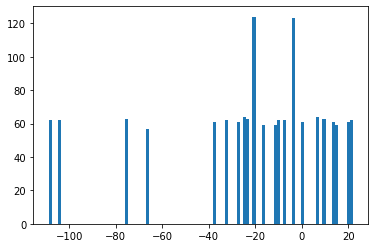

In [152]:
# 0값 -> -1값으로 변경결정
plt.hist(df_ct3['영업이익(억원)'], bins=100)

In [153]:
zeros = np.where(df_ct3['영업이익(억원)'] == 0)
zeros

(array([489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
        502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514,
        515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527,
        528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540,
        541, 542, 543, 544, 545, 546, 547, 548, 549], dtype=int64),)

In [154]:
for idx in zeros:
    df_ct3['영업이익(억원)'].iloc[idx]= -1 

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [155]:
np.where(df_ct3['영업이익(억원)'] == 0)

(array([], dtype=int64),)

### 캔들차트 0값변경

(array([961., 207., 124.,  43.,  38.,  22.,  11.,  10.,  14.,   3.,   6.,
          4.,   6.,   3.,   5.,   1.,   0.,   4.,   2.,   0.,   1.,   1.,
          3.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([   0.,   37.,   74.,  111.,  148.,  185.,  222.,  259.,  296.,
         333.,  370.,  407.,  444.,  481.,  518.,  555.,  592.,  629.,
         666.,  703.,  740.,  777.,  814.,  851.,  888.,  925.,  962.,
         999., 1036., 1073., 1110., 1147., 1184., 1221., 1258., 1295.,
        1332., 1369., 1406., 1443., 1480., 1517., 1554., 1591., 1628.,
        1665., 1702., 1739., 1776., 1813., 1850.]),
 <BarContainer object of 50 artists>)

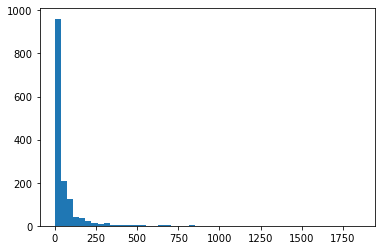

In [156]:
# 0값 -> -1값으로 변경결정
plt.hist(df_ct3['고가-시가'], bins=50)

In [157]:
candle = ['고가-종가','고가-시가','고가-저가', '종가-시가','종가-저가','시가-저가']

In [158]:
for can in candle:
    idxs = np.where(df_ct3[can] == 0)
    for idx in idxs:
        df_ct3[can].iloc[idx]= 1    

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 변동률 적용하기

In [159]:
df_ct3.isnull().sum()

일자             0
종가             0
등락률            0
거래대금           0
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [160]:
df_ct3.columns

Index(['일자', '종가', '등락률', '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
       '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)',
       '영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)',
       'PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [161]:
#  '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
#        '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)'
df_ct3.iloc[:,3:12] = df_ct3.iloc[:,3:12].pct_change()

# EPS(원),BPS(원)
df_ct3.iloc[:,-10:-8] = df_ct3.iloc[:,-10:-8].pct_change()

# 고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
df_ct3.iloc[:,-7:] = df_ct3.iloc[:,-7:].pct_change()

In [127]:
df_ct3

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,5460,-2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,5300,-2.93,0.759210,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,-0.450000,1.250000,-0.200000,-0.875,49.000000,-0.562500,0.0
2,2016-01-06,5340,0.75,-0.270115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,0.454545,1.111111,0.187500,-2.500,-0.400000,-0.985714,0.0
3,2016-01-07,5310,-0.56,0.053081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,0.062500,-0.263158,0.210526,-2.000,1.000000,89.000000,0.0
4,2016-01-08,5230,-1.51,-0.208850,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,-0.647059,-0.785714,-0.434783,0.000,0.166667,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,968,0.94,-0.152835,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.83,1.055556,-0.105263,0.880000,-21.000,0.428571,4.000000,0.0
1471,2021-12-27,976,0.83,-0.250080,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.83,-0.405405,0.000000,-0.446809,-0.750,-0.600000,-0.700000,0.0
1472,2021-12-28,956,-2.05,0.099224,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.83,0.500000,-0.235294,0.423077,3.000,0.000000,1.666667,0.0
1473,2021-12-29,957,0.10,-0.555221,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.83,-0.878788,-0.692308,-0.675676,-1.050,1.000000,-0.666667,0.0


In [163]:
df_ct3.isnull().sum()

일자              0
종가              0
등락률             0
거래대금           26
매출액(억원)         1
영업이익(억원)        1
당기순이익(억원)      61
지배주주순이익(억원)     1
자산총계(억원)        1
부채총계(억원)        1
자본총계(억원)        1
자본금(억원)         1
부채비율(%)         0
영업이익률(%)        0
지배주주순이익률(%)     0
ROA(%)          0
ROE(%)          0
EPS(원)          1
BPS(원)          1
PBR(배)          0
고가-종가           1
고가-시가           1
고가-저가           1
종가-시가           1
종가-저가           1
시가-저가           1
전환사채전환총액        1
dtype: int64

In [164]:
df_ct3[df_ct3['거래대금'].isnull()]

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,5460,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,2016-10-21,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,2016-10-24,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,2016-10-25,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,2016-10-26,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,2016-10-27,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,2016-10-28,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,2016-10-31,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,2016-11-01,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,2016-11-02,8980,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
df_ct3['거래대금'].iloc[190:200]

190    0.117538
191    0.667574
192   -0.056091
193    0.292316
194    1.702305
195   -1.000000
196         NaN
197         NaN
198         NaN
199         NaN
Name: 거래대금, dtype: float64

In [55]:
df_ct3.to_csv('./data/에이비프로바이오1_모델데이터.csv')

# 모델구축

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D

In [111]:
df_ct3 = pd.read_csv('./data/에이비프로바이오1_모델데이터.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,5300,-2.93,0.759210,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,-0.450000,1.250000,-0.200000,-0.875000,49.000000,-0.562500,0.0
2,2016-01-06,5340,0.75,-0.270115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,0.454545,1.111111,0.187500,-2.500000,-0.400000,-0.985714,0.0
3,2016-01-07,5310,-0.56,0.053081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,0.062500,-0.263158,0.210526,-2.000000,1.000000,89.000000,0.0
4,2016-01-08,5230,-1.51,-0.208850,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,-0.647059,-0.785714,-0.434783,0.000000,0.166667,0.111111,0.0
5,2016-01-11,5160,-1.34,-0.179402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,2.000000,3.666667,0.538462,0.333333,-0.714286,-0.400000,0.0


In [112]:
## 추가전처리
(df_ct3==np.inf).sum()

일자             0
종가             0
등락률            0
거래대금           4
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [115]:
df_ct3.iloc[671,:]

일자             2019-02-08
종가                    794
등락률                  0.51
거래대금            -0.737839
매출액(억원)               0.0
영업이익(억원)              0.0
당기순이익(억원)             0.0
지배주주순이익(억원)           0.0
자산총계(억원)              0.0
부채총계(억원)              0.0
자본총계(억원)              0.0
자본금(억원)               0.0
부채비율(%)             56.01
영업이익률(%)            -7.57
지배주주순이익률(%)         -6.72
ROA(%)              -2.35
ROE(%)              -3.67
EPS(원)                0.0
BPS(원)                0.0
PBR(배)               0.68
고가-종가           -0.828571
고가-시가           -0.871795
고가-저가            -0.74359
종가-시가               -1.25
종가-저가                 0.0
시가-저가                 9.0
전환사채전환총액              0.0
Name: 757, dtype: object

In [59]:
df_ct4 = df_ct3[df_ct3['거래대금']!=np.inf]

In [87]:
df_ct4.isnull().sum()

일자             0
종가             0
등락률            0
거래대금           0
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

## X,Y값 설정

In [88]:
df_ct4.head(2)

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,5300,-2.93,0.759210,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,-0.450000,1.250000,-0.2000,-0.875,49.0,-0.562500,0.0
2,2016-01-06,5340,0.75,-0.270115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.33,0.454545,1.111111,0.1875,-2.500,-0.4,-0.985714,0.0


In [89]:
window_size = 20
target_period = 5

X = []
Y = []


for i in range(len(df_ct4) - window_size): 
    
    # 피쳐값 
    X.append([df_ct4.iloc[i+j,3:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct4.iloc[i+j,2] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 5:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [90]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [91]:
X_ary.shape

(1365, 20, 24)

In [92]:
Y1_ary.shape

(1365,)

In [93]:
train_test_split = 1000

x_train = X_ary[:1000]
y_train = Y1_ary[:1000]

x_test = X_ary[1000:]
y_test = Y1_ary[1000:]

## 모델구축

In [98]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(20,24)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               50000     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50,101
Trainable params: 50,101
Non-trainable params: 0
_________________________________________________________________


In [95]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [99]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [100]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
100/100 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.6270 - val_loss: nan - val_accuracy: 0.6110
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.6350 - val_loss: nan - val_accuracy: 0.6110
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.6350 - val_loss: nan - val_accuracy: 0.6110
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.6350 - val_loss: nan - val_accuracy: 0.6110
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.6350 - val_loss: nan - val_accuracy: 0.6110
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.6350 - val_loss: nan - val_accuracy: 0.6110
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.6350 - val_loss: nan - val_accuracy: 0.6110
Epoch 8/50
100/100 [============================

KeyboardInterrupt: 

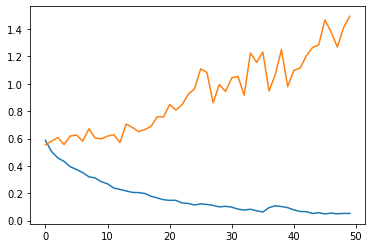

In [90]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

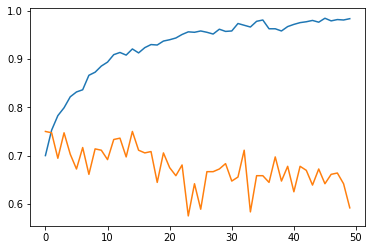

In [91]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])